In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import scipy

In [9]:
from scipy.interpolate import PPoly, splrep, splev

In [10]:
from scipy import interpolate

In [11]:
import operator

In [12]:
import time

In [13]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [14]:
np.random.seed(0)

In [15]:
m = np.zeros((3,2))
m[0] = np.array([1.2, 0.4])
m[1] = np.array([-4.4, 1.0])
m[2] = np.array([4.1, -0.3])

# covariances
S = np.zeros((3,2,2))
S[0] = np.array([[0.8, -0.4], [-0.4, 1.0]])
S[1] = np.array([[1.2, -0.8], [-0.8, 1.0]])
S[2] = np.array([[1.2, 0.6], [0.6, 3.0]])

In [16]:
N_split = 10 # number of data points per mixture component
N = N_split*3 # total number of data points
x = []
y = []
for k in range(3):
    x_tmp, y_tmp = np.random.multivariate_normal(m[k], S[k], N_split).T 
    x = np.hstack([x, x_tmp])
    y = np.hstack([y, y_tmp])

data = np.vstack([x, y])

In [17]:
x

array([ 0.17661964,  1.7434776 , -0.65454836,  0.44688163,  1.49877892,
        1.89894275,  0.73044917,  1.07074797,  0.03375804,  0.50915999,
       -1.52306849, -5.56095314, -7.27099902, -4.51450588, -5.45944197,
       -4.42473048, -4.19161396, -3.98381006, -5.2421169 , -4.1075337 ,
        2.18651835,  5.10214825,  3.41346   ,  4.20335752,  3.06031502,
        4.01081884,  2.69568224,  4.49912688,  4.42651765,  3.42177753])

In [18]:
data.shape

(2, 30)

In [19]:
data.T

array([[ 0.17661964,  2.16480543],
       [ 1.7434776 ,  2.24681174],
       [-0.65454836,  1.66628199],
       [ 0.44688163,  1.19282152],
       [ 1.49877892,  0.48326342],
       [ 1.89894275,  1.15506791],
       [ 0.73044917,  1.13946205],
       [ 1.07074797,  0.94418458],
       [ 0.03375804,  1.66088897],
       [ 0.50915999,  0.31561445],
       [-1.52306849, -1.06714462],
       [-5.56095314,  1.48829128],
       [-7.27099902,  2.4829758 ],
       [-4.51450588,  0.9657518 ],
       [-5.45944197,  2.99758746],
       [-4.42473048,  1.29523915],
       [-4.19161396, -0.61605449],
       [-3.98381006,  0.74563358],
       [-5.2421169 ,  2.61271381],
       [-4.1075337 ,  0.52325424],
       [ 2.18651835, -1.6748215 ],
       [ 5.10214825, -3.78338388],
       [ 3.41346   , -1.04196582],
       [ 4.20335752, -2.66611567],
       [ 3.06031502, -2.99301315],
       [ 4.01081884, -1.94186972],
       [ 2.69568224, -0.82678895],
       [ 4.49912688, -0.47336882],
       [ 4.42651765,

In [20]:
points = data.T

In [21]:
x, y = points[:, 0], points[:, 1]

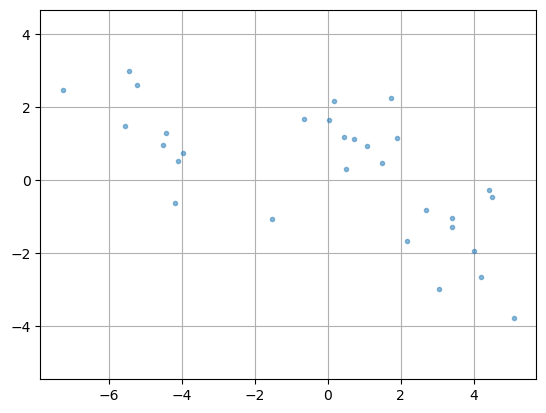

In [23]:
plt.plot(x, y, '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

In [28]:
points = data.T
ind = np.lexsort((points[:,1],points[:,0]))    
points = points[ind]

In [29]:
x, y = points[:, 0], points[:, 1]

R^2:  0.37074975414979394
RSME:  1.3625189783634482
[-7.27099902 -5.56095314 -5.45944197 -4.51450588 -4.42473048 -4.19161396
 -3.98381006 -1.52306849 -0.65454836  0.17661964  0.44688163  0.50915999
  0.73044917  1.49877892  1.7434776   1.89894275  2.18651835  2.69568224
  3.06031502  3.42177753  4.20335752  4.42651765  4.49912688  5.10214825]
Residual Error = 0.49997783315564304


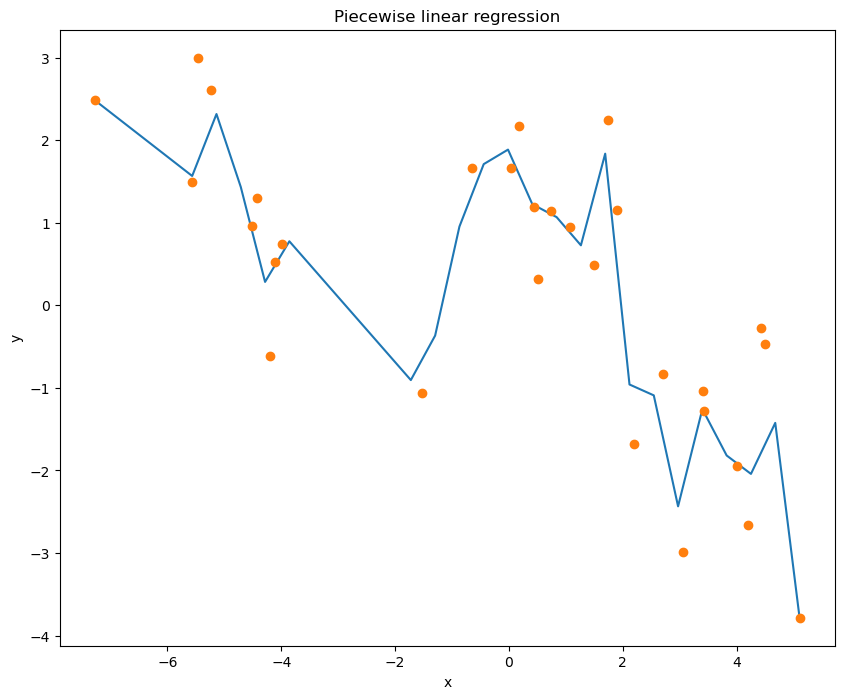

0.140625


In [31]:
from scipy.interpolate import UnivariateSpline

start = time.process_time()
spl = UnivariateSpline(x, y, k=1, s=0.5)
x_new = np.linspace(x.min(), x.max(), N)
y_new = spl(x_new)
print ('R^2: ',r2_score(y, y_new))
rmse = np.sqrt(mean_squared_error(y,y_new)) 
print ('RSME: ',rmse)
print(spl.get_knots())
print("Residual Error = {0}".format(spl.get_residual()))
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, '-')
plt.plot(x, y, 'o')
plt.title('Piecewise linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(time.process_time() - start)

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative).

R^2:  -0.9005474159660907
RSME:  2.367937404672987


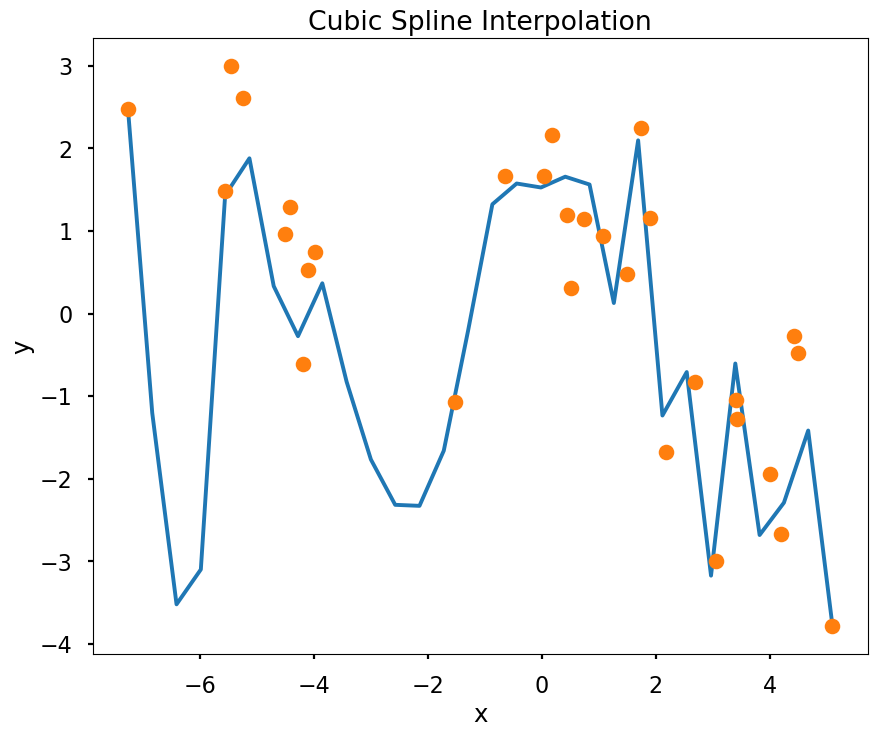

0.21875


In [32]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
start = time.process_time()
# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(x.min(), x.max(), N)
y_new = f(x_new)
print ('R^2: ',r2_score(y, y_new))
rmse = np.sqrt(mean_squared_error(y,y_new)) 
print ('RSME: ',rmse)

# In[4]:


plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, '-')
plt.plot(x, y, 'o')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(time.process_time() - start)

In [37]:
def polynomial_regression(points, degree):
    x, y = reshape_points(points)
    start = time.process_time()
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    accuracy = model.score(x_poly, y)
    print('RMSE: ', rmse)
    print('R^2: ', r2)
    print('Accuracy: ', accuracy)
    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.title(f"Polynomial Regression with degree {degree}")
    plt.plot(x, y_poly_pred, color='m')
    plt.show()
    return time.process_time() - start

In [47]:
def ridge_regression(points, degree):
    x, y = reshape_points(points)
    start = time.process_time()
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    ridge = Ridge(alpha=0.5)
    ridge.fit(x_poly, y)
    y_poly_pred = ridge.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    accuracy = ridge.score(x_poly, y)
    print('RMSE: ', rmse)
    print('R^2: ', r2)
    print('Accuracy: ', accuracy)
    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.title(f"Ridge Regression with degree {degree}")
    plt.plot(x, y_poly_pred, color='m')
    plt.show()
    return time.process_time() - start

In [62]:
def lasso_regression(points, degree):
    x, y = reshape_points(points)
    start = time.process_time()
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    lasso = Lasso(alpha=0.5)
    lasso.fit(x_poly, y)
    y_poly_pred = lasso.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)
    accuracy = lasso.score(x_poly, y)
    print('RMSE: ', rmse)
    print('R^2: ', r2)
    print('Accuracy: ', accuracy)
    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.title(f"Lasso Regression with degree {degree}")
    plt.plot(x, y_poly_pred, color='m')
    plt.show()
    return time.process_time() - start

In [38]:
def reshape_points(points):
    x, y = points[:, 0], points[:, 1]
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    return x, y


RMSE:  1.1060366152902406
R^2:  0.5853541887899862
Accuracy:  0.5853541887899862


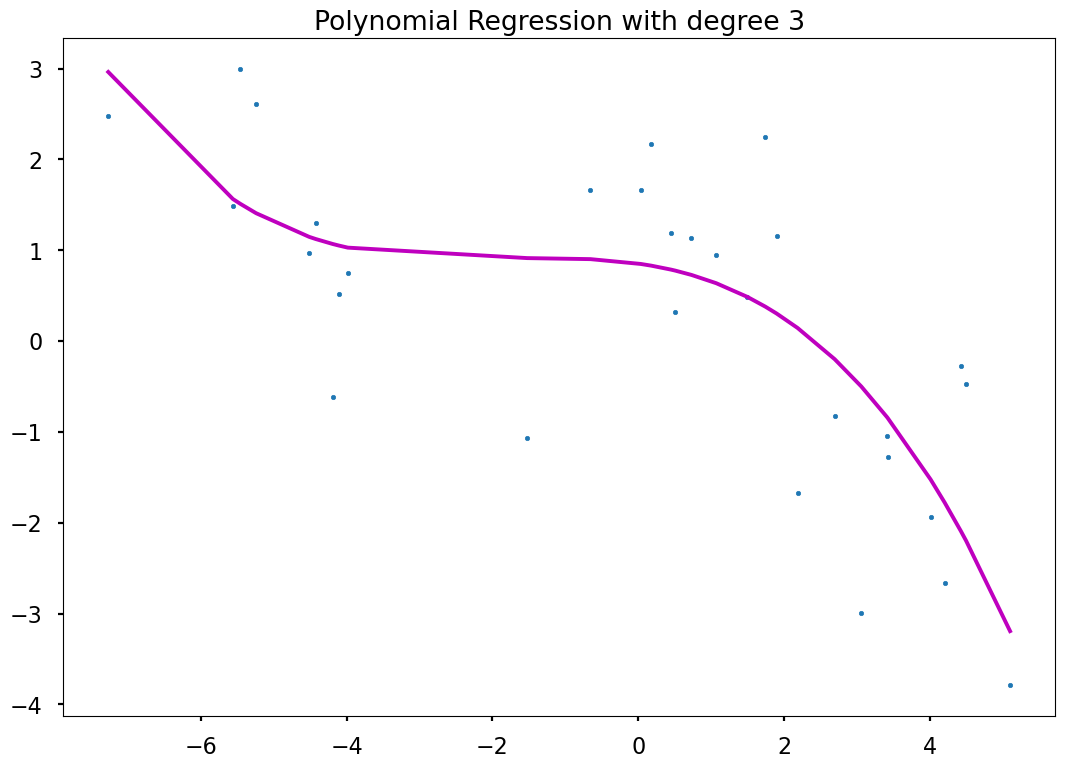

Polynomial regression degree 3 execution time:  0.203125


In [40]:
points = data.T
print('Polynomial regression degree 3 execution time: ', polynomial_regression(points, 3))

RMSE:  0.9569244249880072
R^2:  0.68962012551554
Accuracy:  0.68962012551554


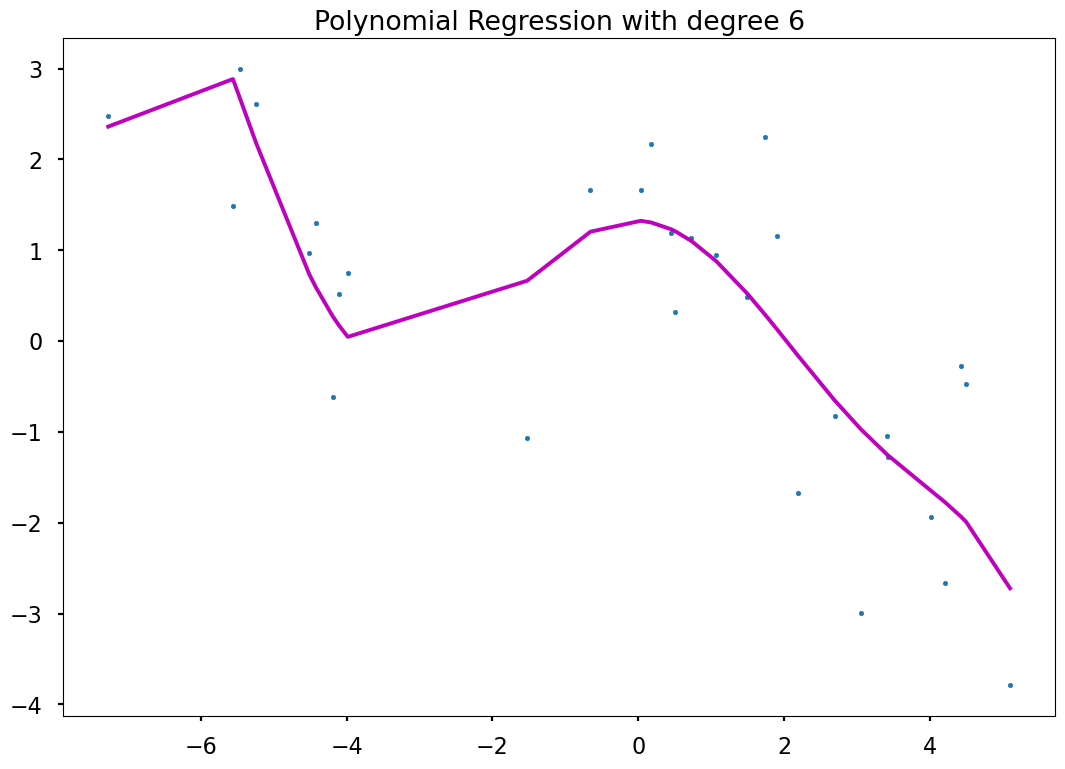

Polynomial regression degree 6 execution time:  0.15625


In [43]:
points = data.T
print('Polynomial regression degree 6 execution time: ', polynomial_regression(points, 6))

RMSE:  0.7584777205141658
R^2:  0.8050047958357075
Accuracy:  0.8050047958357075


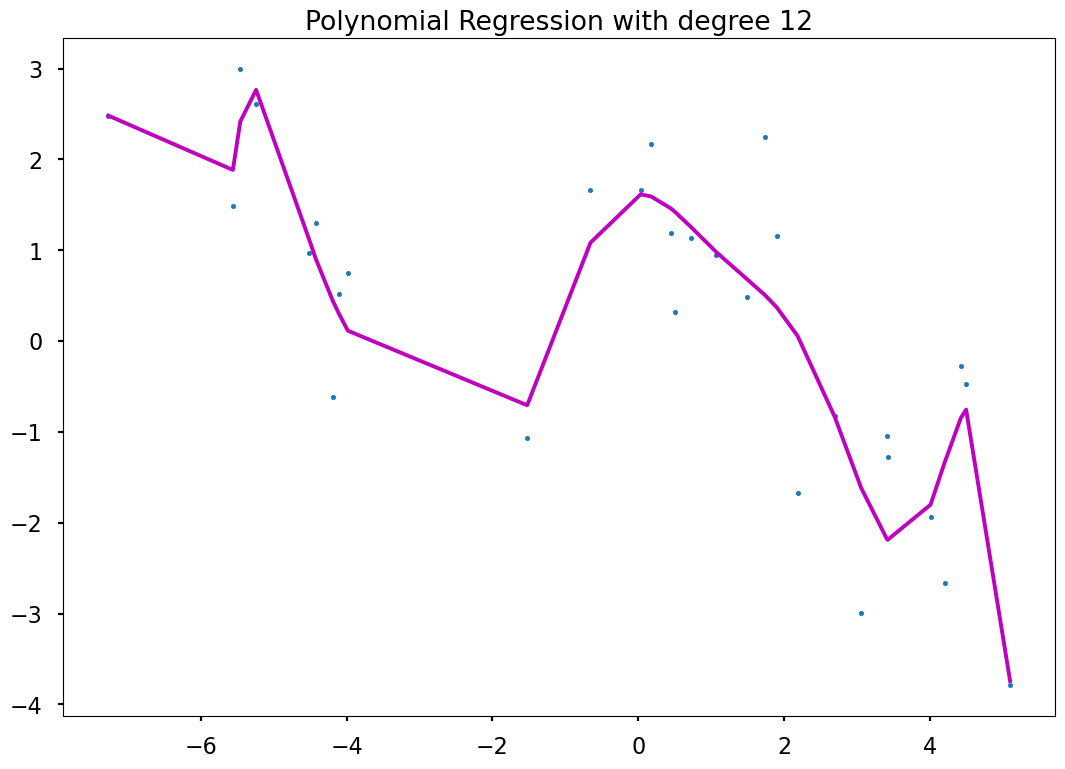

Polynomial regression degree 12 execution time:  0.25


In [44]:
points = data.T
print('Polynomial regression degree 12 execution time: ', polynomial_regression(points, 12))

RMSE:  0.7292853004637518
R^2:  0.819725959221893
Accuracy:  0.819725959221893


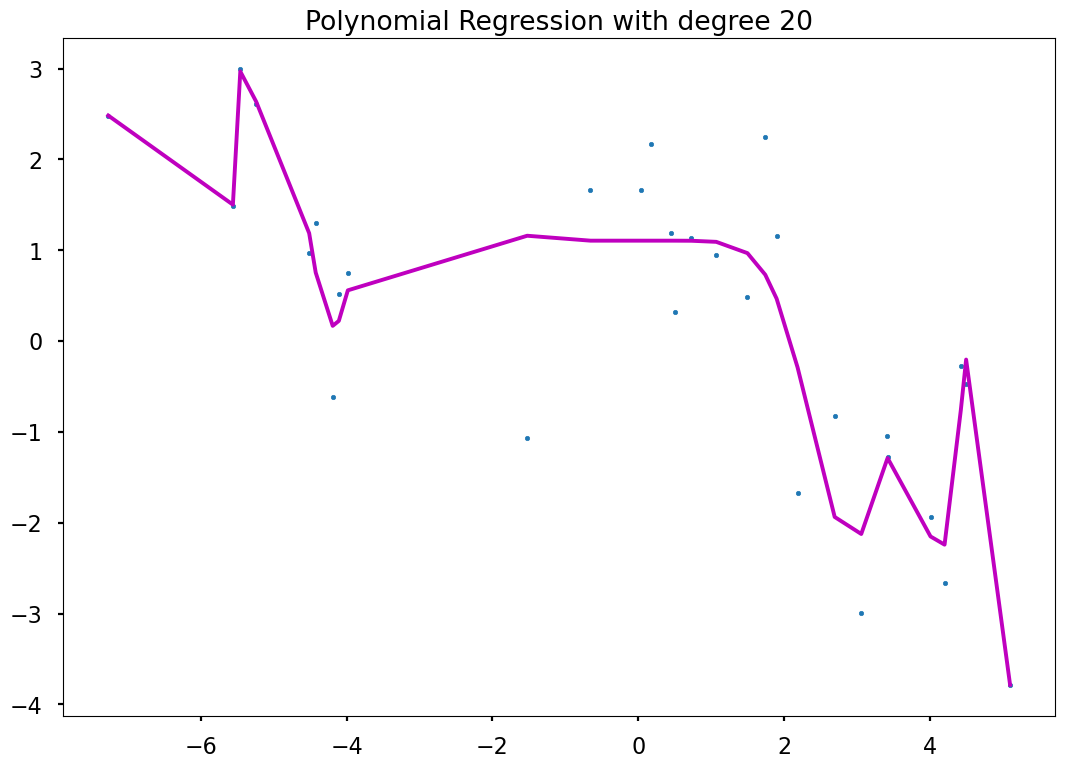

Polynomial regression degree 20 execution time:  0.171875


In [46]:
points = data.T
print('Polynomial regression degree 20 execution time: ', polynomial_regression(points, 20))

RMSE:  1.1060372624281316
R^2:  0.5853537035744145
Accuracy:  0.5853537035744145


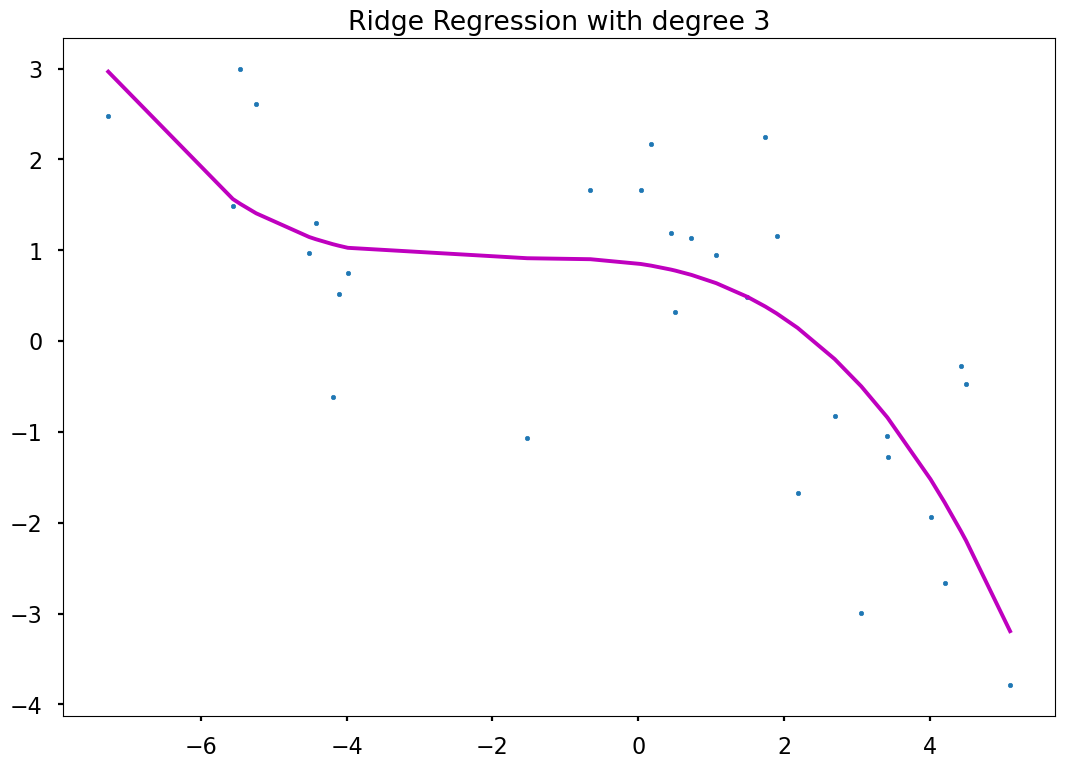

Polynomial ridge regression degree 3 execution time:  0.25


In [49]:
points = data.T
print('Polynomial ridge regression degree 3 execution time: ', ridge_regression(points, 3))

RMSE:  0.956932786672365
R^2:  0.6896147012420808
Accuracy:  0.6896147012420808


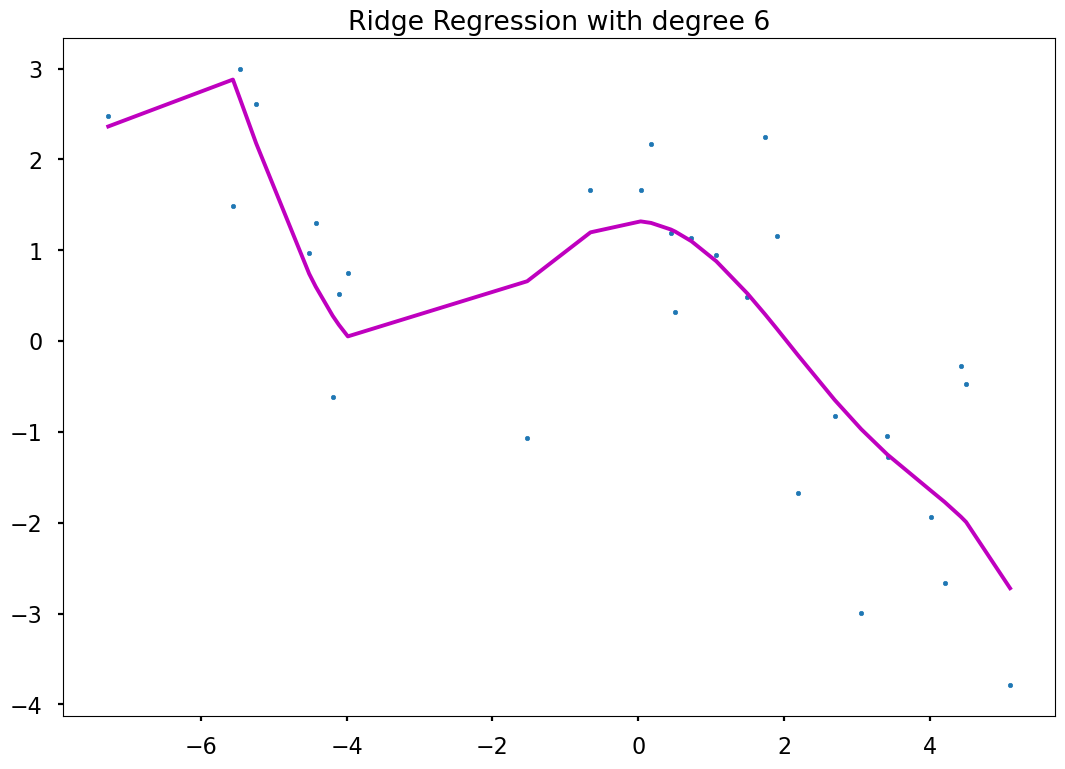

Polynomial ridge regression degree 6 execution time:  0.140625


In [50]:
points = data.T
print('Polynomial ridge regression degree 6 execution time: ', ridge_regression(points, 6))

RMSE:  0.7607058329588232
R^2:  0.8038574730257876
Accuracy:  0.8038574730257876


C:\Users\fahmi\anaconda3\envs\scientificProject\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.40996e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


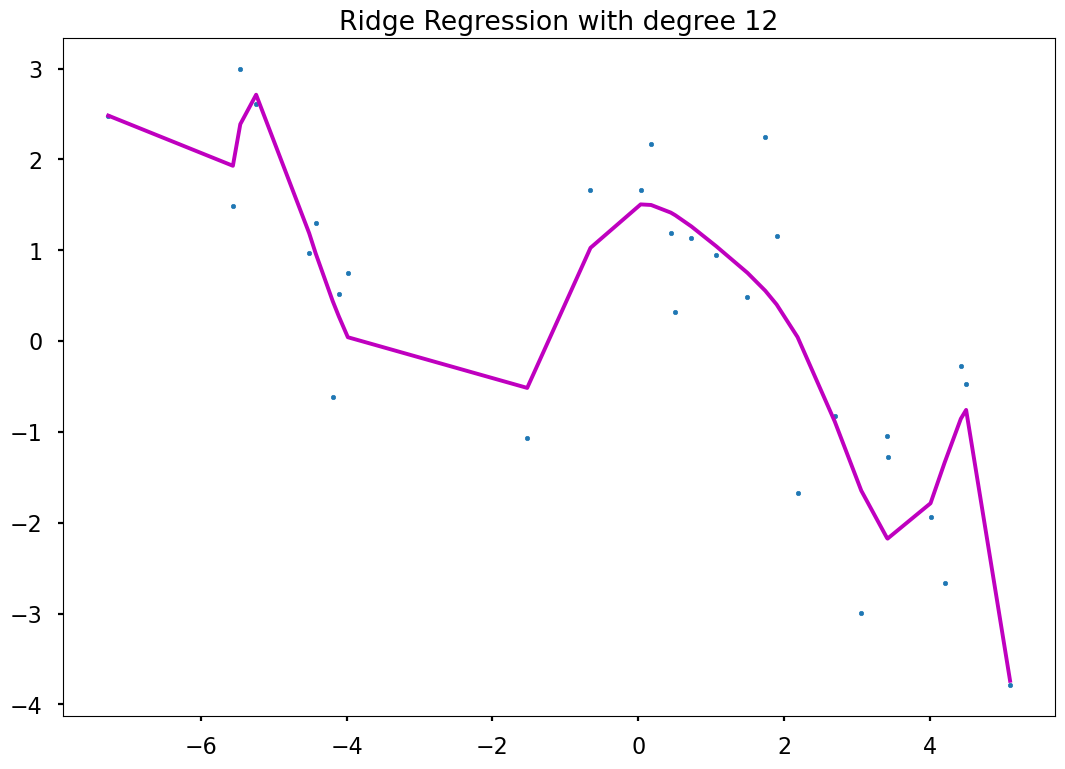

Polynomial ridge regression degree 12 execution time:  0.140625


In [51]:
points = data.T
print('Polynomial ridge regression degree 12 execution time: ', ridge_regression(points, 12))

RMSE:  0.7704885615246173
R^2:  0.7987802223318378
Accuracy:  0.7987802223318378


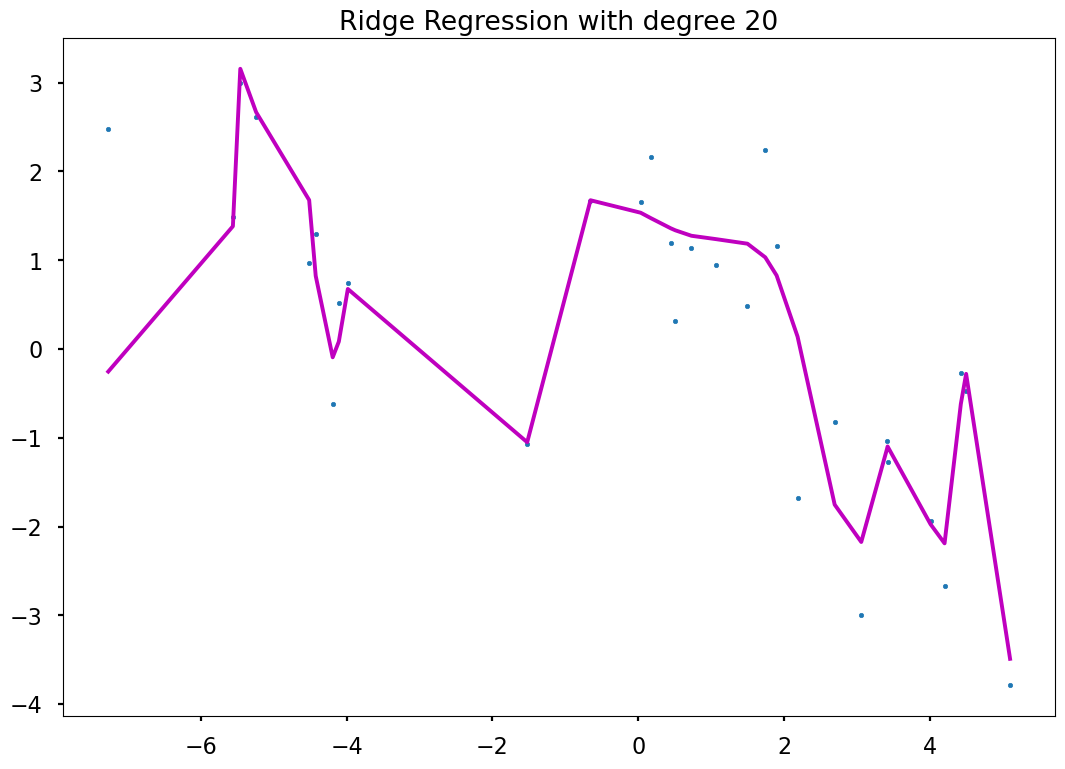

Polynomial ridge regression degree 20 execution time:  0.21875


In [53]:
points = data.T
print('Polynomial ridge regression degree 20 execution time: ', ridge_regression(points, 20))

RMSE:  1.1213516812767337
R^2:  0.5737916532885675
Accuracy:  0.5737916532885675


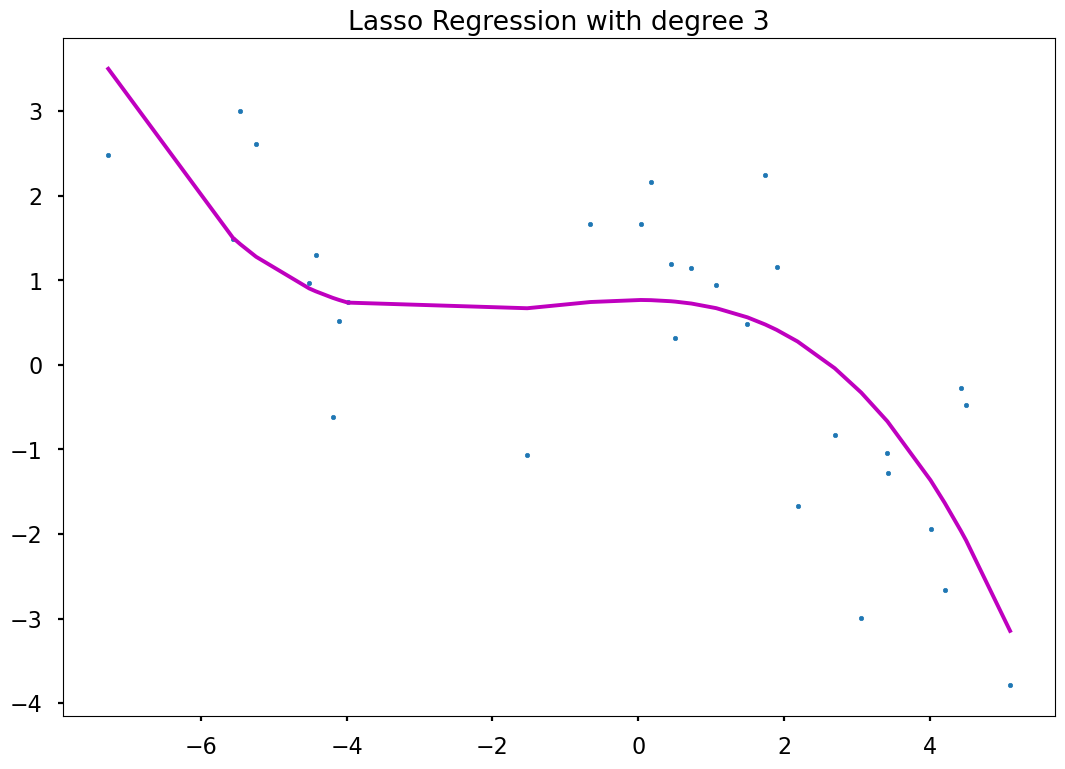

Lasso regression degree 3 execution time:  0.125


In [63]:
points = data.T
print('Lasso regression degree 3 execution time: ', lasso_regression(points, 3))

RMSE:  1.005062883707742
R^2:  0.6576071053423561
Accuracy:  0.6576071053423561


C:\Users\fahmi\anaconda3\envs\scientificProject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+01, tolerance: 8.851e-03
  model = cd_fast.enet_coordinate_descent(


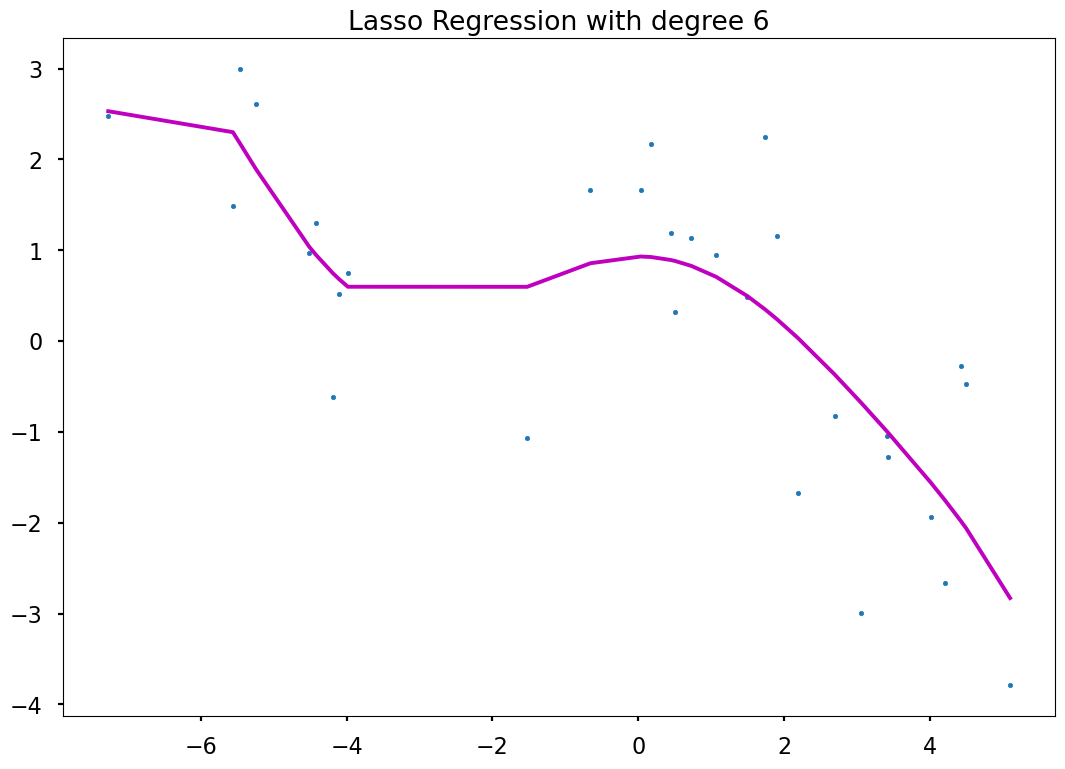

Lasso regression degree 6 execution time:  0.109375


In [64]:
points = data.T
print('Lasso regression degree 6 execution time: ', lasso_regression(points, 6))

RMSE:  1.003396982570842
R^2:  0.6587412035288186
Accuracy:  0.6587412035288186


C:\Users\fahmi\anaconda3\envs\scientificProject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+01, tolerance: 8.851e-03
  model = cd_fast.enet_coordinate_descent(


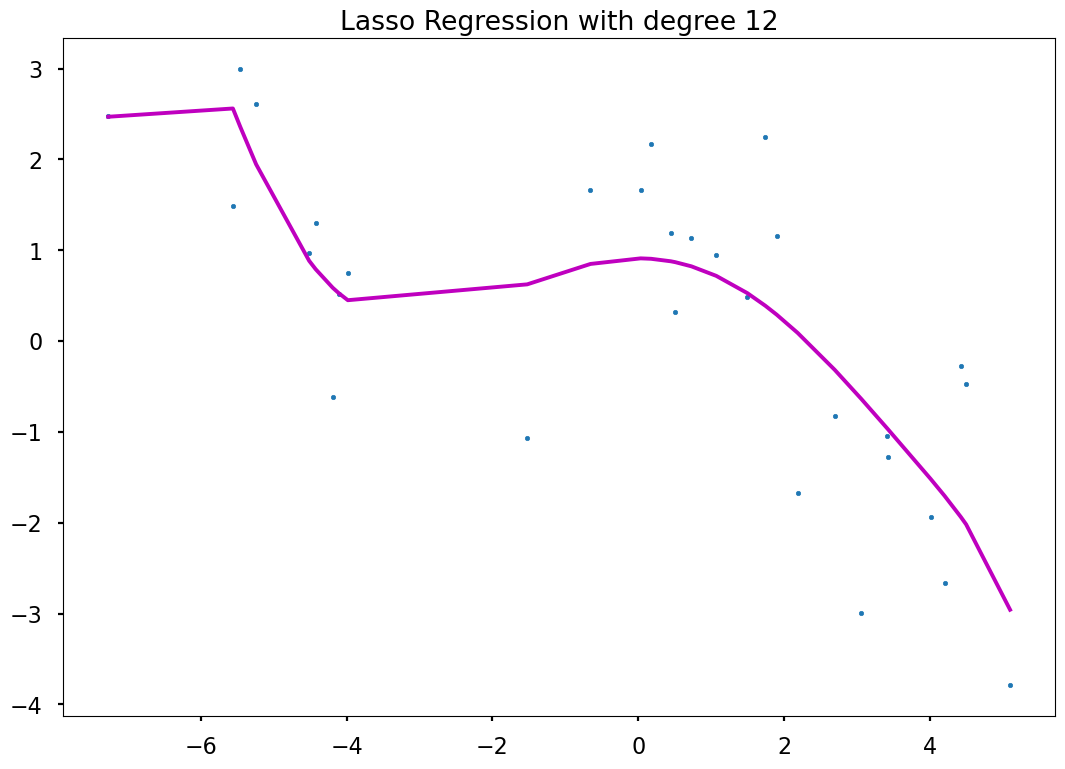

Lasso regression degree 12 execution time:  0.125


In [65]:
points = data.T
print('Lasso regression degree 12 execution time: ', lasso_regression(points, 12))

C:\Users\fahmi\anaconda3\envs\scientificProject\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.764e+01, tolerance: 8.851e-03
  model = cd_fast.enet_coordinate_descent(


RMSE:  0.9945373433382525
R^2:  0.6647409862027549
Accuracy:  0.6647409862027549


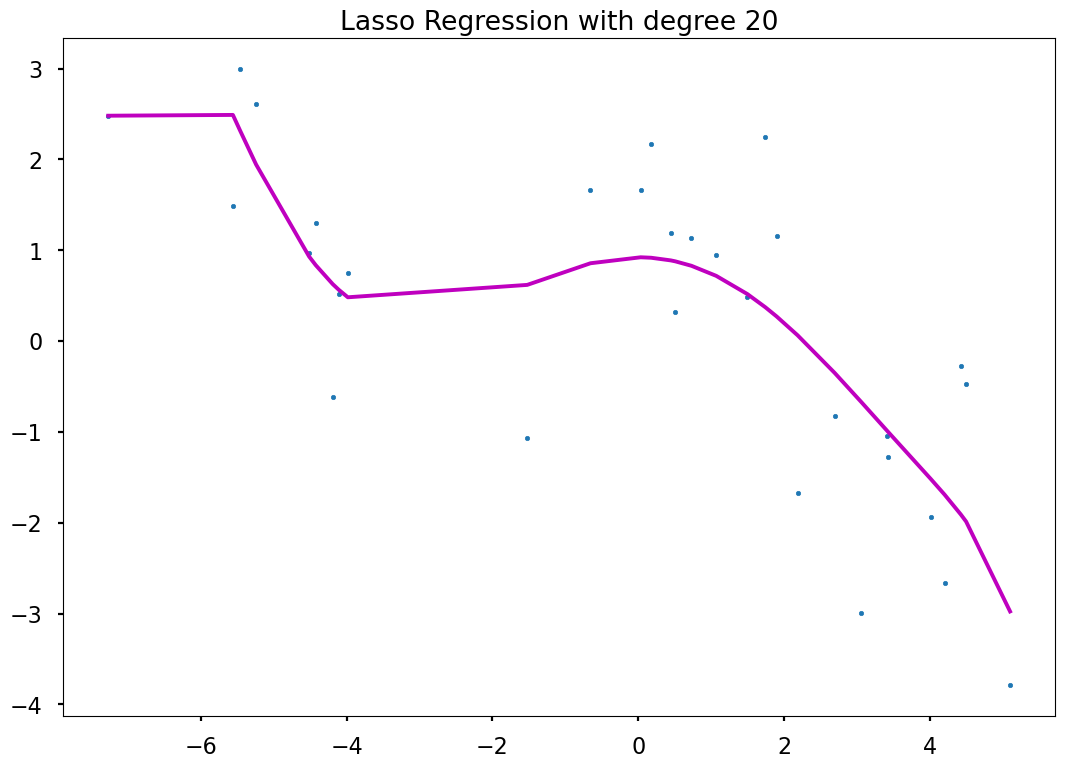

Lasso regression degree 20 execution time:  0.25


In [66]:
points = data.T
print('Lasso regression degree 20 execution time: ', lasso_regression(points, 20))